In [8]:
from dataset_evaluation import (sentence_level_quality,
                                entity_level_quality,
                                esco_blink_predictions,
                                pipeline_prediction,
                                fidelity)

# import sys
# sys.path.append("../evaluation/")
# from evaluate_src import skill_level_metrics
import dataset_evaluation as dse
from importlib import reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import seaborn as sns
import os
import json
from datasets import load_dataset
import random

# Annotated dataset


### Fidelity


On the real data :

In [8]:
vacancies = pd.read_csv("../../data/processed/real/job_offers_compound_2.csv")

metric = fidelity(list(vacancies["enhanced_sentences"]), model_id="gpt2")

Using pad_token, but it is not set yet.


  0%|          | 0/76 [00:00<?, ?it/s]

In [10]:
annot_fidelity = metric["mean_perplexity"]
annot_fidelity

111.46399115887662

### ELQ

In [13]:
test = pd.read_csv("https://raw.githubusercontent.com/jensjorisdecorte/Skill-Extraction-benchmark/main/tech_test_annotations.csv")
multilabel = test.groupby("sentence").agg({"label": lambda x : x.tolist() , "span": lambda x : x.tolist()}).reset_index()
annotated_records = multilabel.to_dict(orient='records')

[autoreload of utils failed: Traceback (most recent call last):
  File "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/IPython/exten

In [ ]:
import random

subs = random.sample(annotated_records, 10)
pip_annot_predictions_short = pipeline_prediction(subs)

In [24]:
entity_level_quality(pip_annot_predictions_short[0])

new


  0%|          | 0/10 [00:00<?, ?it/s]

[['Visual Studio .NET', '.net development experience'], ['manage quality', 'quality'], ['computer technology', 'LABEL NOT PRESENT'], ['perform product planning', 'engineers and developers'], ['liaise with shareholders', 'openness to work with many different stakeholders in the organization'], ['Jenkins (tools for software configuration management)', 'git jenkins'], ['adapt developed game to the market', 'developing mobile games'], ['Agile development', 'LABEL NOT PRESENT'], ['financial engineering', 'LABEL NOT PRESENT']]


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/dataset_evaluation.py:137: RuntimeWarning: invalid value encountered in scalar divide
  "F1_micro": (2*precision_micro*recall_micro / (precision_micro + recall_micro)),
/mnt/u14157_ic_nlp_

{'1_to_1': {'accuracy': 0.0,
  'precision_micro': 0.0,
  'precision_macro': 0.0,
  'recall_micro': 0.0,
  'recall_macro': 0.0,
  'F1_micro': nan,
  'F1_macro': nan},
 'many_to_many': {'jaccard_accuracy': 0.0}}

In [18]:
for tentry in pip_annot_predictions_short[0]:
    entry = tentry[0]
    print("-"*150)
    print("sentence : ", entry["sentence"])
    print("labels : ", entry["label"])
    print("spans : ", entry["span"])
    print("extracted_skills : ", entry["extracted_skills"])
    print("~"*60)
    for cand in entry["skill_candidates"]:
        print(cand)
    print("~"*60)
    print("matched skill : ", end="")
    for msk in entry["matched_skills"]:
        print(msk)

------------------------------------------------------------------------------------------------------------------------------------------------------
sentence :  The role will require proficiency in all aspects of software development including:
labels :  ['oversee development of software']
spans :  ['software development']
extracted_skills :  ['software development']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
software development
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
matched skill : software development
------------------------------------------------------------------------------------------------------------------------------------------------------
sentence :  <LOCATION> or <LOCATION> work permit is a must
labels :  ['UNDERSPECIFIED']
spans :  ['<LOCATION> or <LOCATION> work permit']
extracted_skills :  ['<location> or <location> work permit is a must']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<location> or <location> wo

In [ ]:
if(os.path.isfile("preds.json")):
    print("> Loading precomputed results")
    with open('preds.json', 'w') as f:
        pip_annot_predictions = json.load(f)
else :
    print("> Computing predictions")
    pip_annot_predictions = pipeline_prediction(annotated_records)
    with open('preds.json', 'w') as f:
        json.dump(pip_annot_predictions, f)

In [64]:
pip_annot_ELQ = entity_level_quality(pip_annot_predictions[0])
pip_annot_ELQ

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

{'1_to_1': {'accuracy': 0.01483679525222552,
  'precision_micro': 0.01483679525222552,
  'precision_macro': 0.010204081632653062,
  'recall_micro': 0.01483679525222552,
  'recall_macro': 0.005473505191550304,
  'F1_micro': 0.01483679525222552,
  'F1_macro': 0.007125088116891062},
 'many_to_many': {'jaccard_accuracy': 0.008316526610644259}}

### SLQ

In [22]:
annot_SLQ = sentence_level_quality(pd.DataFrame(annotated_records).explode("label"))

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/1164 [00:00<?, ?it/s]

  0%|          | 0/1164 [00:00<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


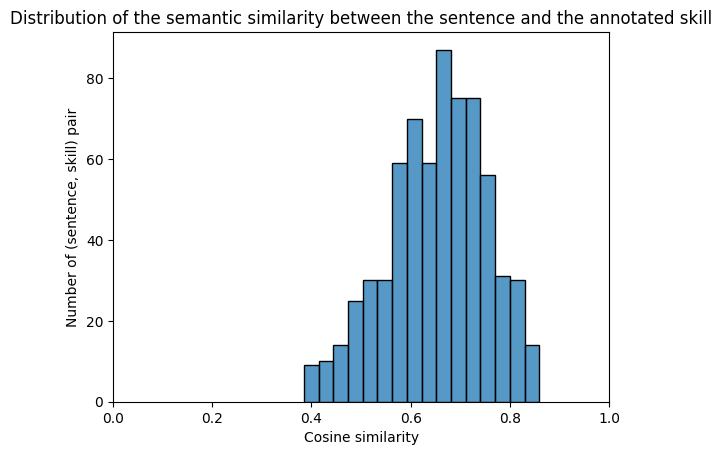

In [28]:
g = sns.histplot(data=annot_SLQ.reset_index(), x="sim")
g.set_xlim((0, 1))
g.set_title("Distribution of the semantic similarity between the sentence and the annotated skill")
g.set_xlabel("Cosine similarity")
g.set_ylabel("Number of (sentence, skill) pair");

In [27]:
annot_SLQ_metrics = {
    'mean': annot_SLQ.sim.mean(),
    'median': annot_SLQ.sim.median(),
    'var': annot_SLQ.sim.var()
}

### Conlusion

In [ ]:
metrics = {
    "annotated" : {
        "fidelity" : annot_fidelity,
        "SLQ": annot_SLQ_metrics,
        "pip_ELQ": pip_annot_ELQ,
    }
}

# Synthetic dataset

In [3]:
ds = load_dataset("jensjorisdecorte/Synthetic-ESCO-skill-sentences")["train"]

### Fidelity

In [14]:
metric = fidelity(ds["sentence"], model_id="gpt2")

Using pad_token, but it is not set yet.


  0%|          | 0/8642 [00:00<?, ?it/s]

In [15]:
synth_fidelity = metric["mean_perplexity"]
synth_fidelity

104.67401827280452

### ELQ

In [4]:
synth_ds = pd.DataFrame(ds)
csynth_ds = synth_ds.groupby("sentence").agg({'skill' : lambda x: x.tolist()}).reset_index()
csynth_records = csynth_ds.to_dict(orient='records')

In [ ]:
subs_csr = random.sample(csynth_records, 15)
pip_synth_predictions = pipeline_prediction(subs_csr)

In [15]:
pip_synth_ELQ = entity_level_quality(pip_synth_predictions[0], label_key="skill")

new


  0%|          | 0/15 [00:00<?, ?it/s]

[[["report on customers' complaints related to toilet facilities"], ['communication skills']], [['repair clocks'], ['disassemble and assemble clocks and their parts']], [['use content management system software'], ['content management systems']], [['interpret radiology examinations'], ['ability to communicate effectively with referring physicians and other medical professionals']], [['maintain stage weapons'], []], [['supervise children'], ['snacks or bathroom breaks']], [['compare production forecasts with actual results'], ['compare production forecasts with actual results']], [['rear food fish'], ['breeding and rearing of food fish']], [['host trade delegations'], ["ability to anticipate and address issues that may arise during a delegation's visit"]], [['install lighting'], []], [['manage casino'], ['financial management, employee relations, and compliance with local and federal regulations']], [['verify formal ICT specifications'], ['efficiency and correctness of algorithms and sy

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SLQ

In [13]:
synth_SLQ = sentence_level_quality(synth_ds[:10_000], label_key="skill")

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/10000 [00:00<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/dataset_evaluation.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["embeddings"] = dataset["sentence"]\
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/dataset_evaluation.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["embeddings"] = dataset["embeddings"].apply(lambda x : x.detach())


  0%|          | 0/10000 [00:02<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/dataset_evaluation.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["sim"] = dataset[["embeddings", label_key]].progress_apply(compute_cos_sim, axis=1)


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


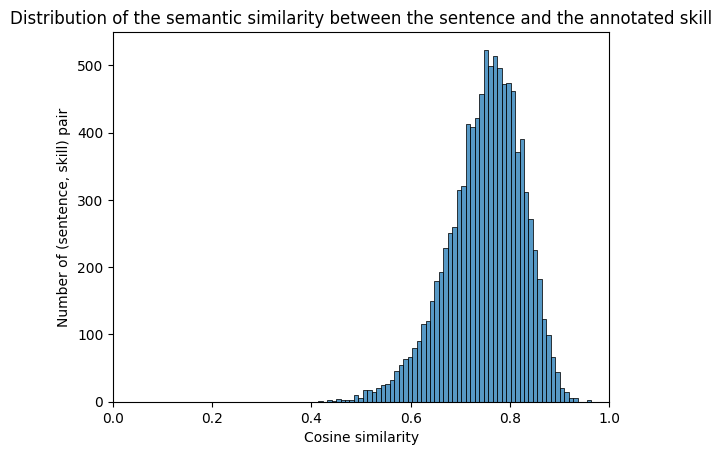

In [14]:
g = sns.histplot(data=synth_SLQ.reset_index(), x="sim")
g.set_xlim((0, 1))
g.set_title("Distribution of the semantic similarity between the sentence and the annotated skill")
g.set_xlabel("Cosine similarity")
g.set_ylabel("Number of (sentence, skill) pair");

## Slightly deeper SkillSpan Analysis

In [21]:
[ar["label"] for ar in subs]

[['Visual Studio .NET', 'LABEL NOT PRESENT'],
 ['manage quality'],
 ['UNDERSPECIFIED',
  'UNDERSPECIFIED',
  'LABEL NOT PRESENT',
  'LABEL NOT PRESENT',
  'LABEL NOT PRESENT',
  'LABEL NOT PRESENT'],
 ['computer technology', 'LABEL NOT PRESENT'],
 ['perform product planning'],
 ['liaise with shareholders'],
 ['LABEL NOT PRESENT',
  'LABEL NOT PRESENT',
  'Jenkins (tools for software configuration management)'],
 ['adapt developed game to the market', 'LABEL NOT PRESENT'],
 ['Agile development', 'financial engineering'],
 ['LABEL NOT PRESENT']]

In [22]:
pip_annot_predictions_short

([[{'sentence': '. NET development experience within an MS Dynamics 365 environment',
    'label': ['Visual Studio .NET', 'LABEL NOT PRESENT'],
    'span': ['. NET', 'MS Dynamics 365'],
    'extracted_skills': ['.net development experience'],
    'skill_candidates': {'.net development experience': [{'unique_id': 2600,
       'Type Level 2': 'knowledge',
       'name+definition': 'Octopus Deploy : The tool Octopus Deploy is a software program used to automate ASP.NET applications deployment to local or on the cloud servers.'},
      {'unique_id': 4752,
       'Type Level 2': 'knowledge',
       'name+definition': 'ASP.NET : The techniques and principles of software development, such as analysis, algorithms, coding, testing and compiling of programming paradigms in ASP.NET.'},
      {'unique_id': 6210,
       'Type Level 2': 'knowledge',
       'name+definition': 'Oracle WebLogic : The application server Oracle WebLogic is Java EE based application server which serves as a middle tier th

In [17]:
import pickle
emb_sh = "_jbEn"
with open(f"../../data/taxonomy/taxonomy_embeddings{emb_sh}.pkl", "rb") as f:
    emb_tax = pickle.load(f)

In [18]:
skills_names = emb_tax["name+definition"].apply(lambda x : x.split(" : ")[0]).to_list()

In [20]:
l = [[['electronic components'], []], [['hot forging'], ['hot forging experience']], [['interact verbally in Dutch'], ['dutch', 'dutch-speaking stakeholders']], [['repair orthopedic goods'], ['repairing and maintaining orthopedic products']], [['cold winding'], ['cold winding experience']], [['apply knowledge of science, technology and engineering'], ['science, technology, and engineering']], [['supervise aquaculture circulation system'], ['monitoring water chemistry', 'supervising aquaculture circulation systems']], [['write work-related reports'], ['written and verbal communication skills']], [['apply strategic thinking'], ['experience with strategic thinking and long-term planning']], [['microsensors'], ['microsensors']], [['polygraphy'], ['printing techniques and machinery associated with printing and polygraphy']], [['teach principles of literature'], ['analytical reading and writing', 'love of literature']], [['coordinate government activities in foreign institutions'], ['leading and managing the day-to-day activities of a delegation']], [['advise on financial matters'], ['asset management and investment strategies']], [['teach dance'], ['teaching dance', 'choreography']]]



labels_not_in_tax = 0
preds_not_in_tax = 0
for labels, preds in l:
    for label in labels:
        if(label not in skills_names):
            labels_not_in_tax += 1
    for pred in preds:
        if(pred not in skills_names):
            preds_not_in_tax += 1
print("l not in :", labels_not_in_tax, ", p not in : ", preds_not_in_tax)

l not in : 0 , p not in :  17


In [19]:
for te in pip_synth_predictions[0]:
    e = te[0]
    candis = list(e["skill_candidates"].keys())
    for cand in candis:
        if(cand not in skills_names):
            print(cand, "isn't in labels")

attention to detail isn't in labels
hot forging experience isn't in labels
dutch isn't in labels
dutch-speaking stakeholders isn't in labels
repairing and maintaining orthopedic products isn't in labels
cold winding experience isn't in labels
science, technology, and engineering isn't in labels
monitoring water chemistry isn't in labels
supervising aquaculture circulation systems isn't in labels
written and verbal communication skills isn't in labels
experience with strategic thinking and long-term planning isn't in labels
printing techniques and machinery associated with printing and polygraphy isn't in labels
analytical reading and writing isn't in labels
love of literature isn't in labels
leading and managing the day-to-day activities of a delegation isn't in labels
asset management and investment strategies isn't in labels
teaching dance isn't in labels
choreography isn't in labels


In [22]:
cols = ["conceptType", "skillType", "reuseLevel", "preferredLabel", "altLabels", "description"]
tax = pd.read_csv("../../../esco/skills_en.csv")[cols]
tax = tax.reset_index()
tax.columns = ["unique_id",
            "Type Level 1",
            "Type Level 2",
            "Type Level 3",
            "name",
            "Example",
            "Definition"
            ]
tax["name+definition"] = tax[["name", "Definition"]].apply(lambda x : x["name"] + " : " + x["Definition"], axis=1)
    

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
